Zadanie 1 Wczytanie danych do jednego pandas dataframe

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
data_path = './data'
dataframes = []

for filename in os.listdir(data_path):
    if filename.endswith(".txt"):
        year = int(filename[3:7])
        file_path = os.path.join(data_path, filename)

        df = pd.read_csv(file_path, header=None, names=["Name", "Sex", "Count"])
        df['Year'] = year
        dataframes.append(df)
all_data = pd.concat(dataframes, ignore_index=True)
all_data

,Name,Sex,Count,Year
0,Mary,F,63254,1942
1,Barbara,F,44736,1942
2,Patricia,F,39461,1942
3,Linda,F,31611,1942
4,Carol,F,30271,1942
...,...,...,...,...
2085153,Ysmael,M,5,1945
2085154,Zacarias,M,5,1945
2085155,Zach,M,5,1945
2085156,Zachariah,M,5,1945


Zadanie 2 Ile unikalnych imion zostalo nadanych w tym czasie

In [20]:
unique_names_count = all_data['Name'].nunique()
print(f"Liczba unikalnych imion w calym zbiorze: {unique_names_count}")

Liczba unikalnych imion w calym zbiorze: 102449


Zadanie 3 Ile unikalnych imion zostało nadanych rozróżniając płeć żeńską i męską

In [21]:
unique_names_by_sex = all_data.groupby(['Sex', 'Name'])['Name'].nunique()
unique_names_by_sex_count = unique_names_by_sex.groupby('Sex').sum()
print(f"Liczba unikalnych imion  F: {unique_names_by_sex_count['F']}, Liczba unikalnych imion M: {unique_names_by_sex_count['M']}")

Liczba unikalnych imion  F: 70227, Liczba unikalnych imion M: 43655


Zadanie 4 Stwórz nowe kolumny frequency_male i frequency_female i określ popularność każdego z imion w danym każdym roku dzieląc liczbę razy, kiedy imię zostało nadane przez całkowita liczbę urodzeń dla danej płci.

In [22]:
# Suma urodzeń dla każdego roku i płci 
all_data['Total_birth'] = all_data.groupby(['Year', 'Sex'])['Count'].transform('sum')
all_data['Frequency_appearance'] = all_data['Count']/all_data['Total_birth']

result_data = all_data.pivot(index=['Year', 'Name'], columns='Sex', values='Frequency_appearance').fillna(0).reset_index()
result_data.rename(columns={"F" : "frequency_female", "M" : "frequency_male"}, inplace=True)
result_data

Sex,Year,Name,frequency_female,frequency_male
0,1880,Aaron,0.000000,0.000923
1,1880,Ab,0.000000,0.000045
2,1880,Abbie,0.000780,0.000000
3,1880,Abbott,0.000000,0.000045
4,1880,Abby,0.000066,0.000000
...,...,...,...,...
1903285,2022,Zyrie,0.000000,0.000006
1903286,2022,Zyrin,0.000000,0.000003
1903287,2022,Zyron,0.000000,0.000007
1903288,2022,Zyrus,0.000000,0.000005


Zadanie 5 Określ i wyświetl wykres złożony z dwóch podwykresów, gdzie osią x jest skala czasu, a oś y reprezentuje: liczbę urodzin w danym roku (wykres na górze), stosunek liczby narodzin dziewczynek do liczby narodzin chłopców w każdym roku(wykres na dole) W którym roku zanotowano najmniejszą, a w którym największą różnicę w liczbie urodzeń między chłopcami a dziewczynkami (pytanie dotyczy podwykresu przedstawiającego stosunek liczby urodzin)? Odpowiedź wyznacz i wyświetl na ekranie

In [23]:
# Sum of births per year (all female + male results) - liczba urodzin w danym roku (wykres na górze)
all_data['Total_birth_fm'] = all_data.groupby(['Year'])['Count'].transform('sum')
total_births_per_year = all_data[['Year', 'Total_birth_fm']].groupby(['Year'], as_index=False).mean()
total_births_per_year

,Year,Total_birth_fm
0,1880,201484.0
1,1881,192690.0
2,1882,221533.0
3,1883,216945.0
4,1884,243461.0
...,...,...
138,2018,3511750.0
139,2019,3465821.0
140,2020,3333981.0
141,2021,3379713.0


In [24]:
# stosunek liczby narodzin dziewczynek do liczby narodzin chłopców w każdym roku (wykres na dole)
births_per_year_female_male = all_data.pivot(index=['Year', 'Name'], columns='Sex', values='Count').fillna(0).reset_index()
births_per_year_female_male_sum = births_per_year_female_male[['Year', 'F', 'M']].groupby(['Year'], as_index=False).sum()
births_per_year_female_male_sum['Ratio'] = births_per_year_female_male_sum['F']/births_per_year_female_male_sum['M']

# Najmniejsza i największa różnica między chłopcami a dziewczynkami
min_diff_year = births_per_year_female_male_sum.loc[births_per_year_female_male_sum['Ratio'].idxmin()]['Year']
max_diff_year = births_per_year_female_male_sum.loc[births_per_year_female_male_sum['Ratio'].idxmax()]['Year']
print(f"Rok z min różnicą girls - boys births: {min_diff_year}, rok z max różnicą: {max_diff_year}")

Rok z min różnicą girls - boys births: 1880.0, rok z max różnicą: 1901.0


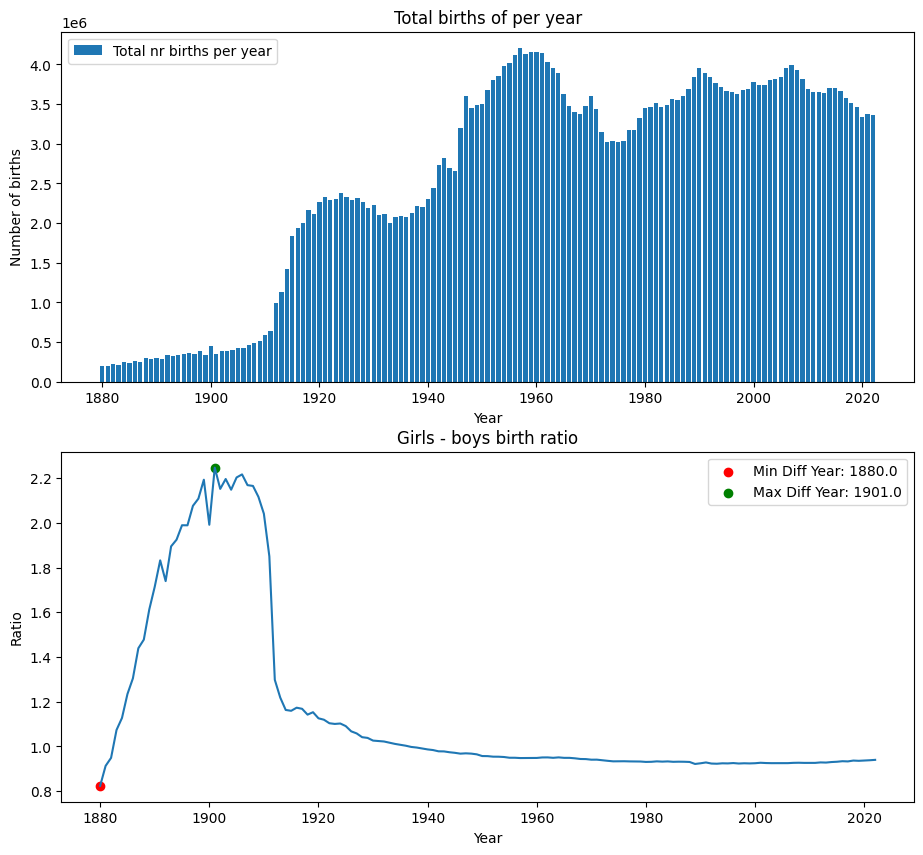

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey = False, figsize=(11, 10))

axes[0].bar(total_births_per_year['Year'], total_births_per_year['Total_birth_fm'])
axes[0].set_ylabel('Number of births')
axes[0].set_xlabel('Year')
axes[0].legend(['Total nr births per year'], loc='upper left')
axes[0].set_title('Total births of per year')

axes[1].plot(births_per_year_female_male_sum['Year'], births_per_year_female_male_sum['Ratio'])
axes[1].set_ylabel('Ratio')
axes[1].set_xlabel('Year')
axes[1].set_title('Girls - boys birth ratio')

# Zaznaczenie min_diff i max_diff
axes[1].scatter(min_diff_year, births_per_year_female_male_sum.loc[births_per_year_female_male_sum['Year'] == min_diff_year]['Ratio'].values[0],
               color='red', marker='o', label=f'Min Diff Year: {min_diff_year}')
axes[1].scatter(max_diff_year, births_per_year_female_male_sum.loc[births_per_year_female_male_sum['Year'] == max_diff_year]['Ratio'].values[0],
               color='green', marker='o', label=f'Max Diff Year: {max_diff_year}')
axes[1].legend()

Zadanie 6 Wyznacz 1000 najpopularniejszych imion dla każdej płci w całym zakresie czasowym

In [26]:
# Dla każdego imienia kumulacyjna suma wartości frequency - jako najpopularniejsze należy uznać imiona, które najdłużej zajmowały wysokie miejsce na liście rankingowej
result_data_test = all_data.groupby(['Year', 'Name', 'Sex'])['Frequency_appearance'].sum().unstack(fill_value=0).reset_index()

top_names_per_year_sex = all_data.groupby(['Year', 'Sex', 'Name'])['Frequency_appearance'].sum().reset_index()
# Year - ascending, Sex - ascending, Frequency - descending 
top_names_per_year_sex = top_names_per_year_sex.sort_values(by=['Year', 'Sex', 'Frequency_appearance'], ascending=[True, True, False])
top_names_per_year_sex['Rank'] = top_names_per_year_sex.groupby(['Year', 'Sex']).cumcount() + 1


top1000_ranking = top_names_per_year_sex[top_names_per_year_sex['Rank'] <= 1000].groupby(['Sex', 'Name'])['Frequency_appearance'].sum().reset_index()
top1000_ranking = top1000_ranking.sort_values(by=['Sex', 'Frequency_appearance'], ascending=[True, False])
top1000_ranking['Rank'] = top1000_ranking.groupby('Sex').cumcount() + 1

print("Top 1000 imion dla płci żeńskiej:")
print(top1000_ranking[top1000_ranking['Sex'] == 'F'].head(1000))

print("\nTop 1000 imion dla płci męskiej:")
print(top1000_ranking[top1000_ranking['Sex'] == 'M'].head(1000))



Top 1000 imion dla płci żeńskiej:
     Sex       Name  Frequency_appearance  Rank
2936   F       Mary              4.749131     1
1281   F  Elizabeth              1.543251     2
2845   F   Margaret              1.443219     3
274    F       Anna              1.304498     4
1705   F      Helen              1.299765     5
...   ..        ...                   ...   ...
1961   F    Jenifer              0.014003   996
2718   F        Luz              0.014000   997
73     F      Aisha              0.013998   998
1790   F       Iola              0.013956   999
176    F     Althea              0.013951  1000

[1000 rows x 4 columns]

Top 1000 imion dla płci męskiej:
     Sex     Name  Frequency_appearance  Rank
6310   M     John              5.631279     1
6158   M    James              4.876026     2
7945   M  William              4.745829     3
7384   M   Robert              4.008427     4
4986   M  Charles              2.690533     5
...   ..      ...                   ...   ...
5378   M 

Zadanie 7 Wyświetl na jednym wykresie zmiany dla imienia męskiego John i pierwszego imienia żeńskiego rankingu top-1000 (zaopatrz wykres w odpowiednią legendę):
    na osi Y po lewej liczbę razy kiedy imę zostało nadane w każdym roku (wyświetl ile razy nadano to imię w 1934, 1980 i 2022r)?
    na osi Y po prawej popularność tych imion w każdym z tych lat


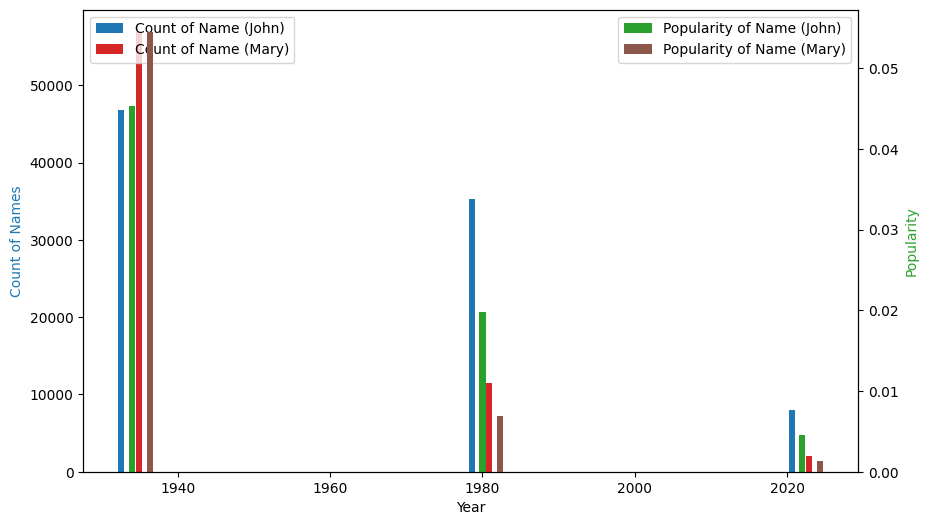

In [74]:
years_to_plot = [1934, 1980, 2022]

# John count 
john_count = all_data[(all_data['Name'] == 'John')& (all_data['Year'].apply(lambda x: x in years_to_plot))]

# First female name count
first_female_name = top1000_ranking[top1000_ranking['Sex'] == 'F'].head(1)['Name'].values[0]
first_female_name_count = all_data[(all_data['Name'] == first_female_name) & (all_data['Year'].apply(lambda x: x in years_to_plot))]


fig, ax = plt.subplots(figsize=(10, 6))
# Lewa strona tj. count
bar_width = 0.5
bar_gap = 0.9
bar_positions_john = john_count['Year'] - bar_width - bar_gap
bar_positions_female = first_female_name_count['Year'] + bar_gap

ax.set_xlabel('Year')
ax.set_ylabel('Count of Names', color='tab:blue')
ax.bar(bar_positions_john, john_count['Count'], color='tab:blue', label='Count of Name (John)')
ax.bar(bar_positions_female, first_female_name_count['Count'], color='tab:red', label=f'Count of Name ({first_female_name})')
ax.tick_params(axis='y')
ax.legend(loc='upper left')

bar_positions_john_popularity = bar_positions_john + bar_width + bar_gap
bar_positions_female_popularity = bar_positions_female + bar_width + bar_gap

ax2 = ax.twinx()
ax2.set_ylabel('Popularity', color='tab:green')
ax2.bar(bar_positions_john_popularity, john_count['Frequency_appearance'], color='tab:green', label='Popularity of Name (John)')
ax2.bar(bar_positions_female_popularity, first_female_name_count['Frequency_appearance'], color='tab:brown', label=f'Popularity of Name ({first_female_name})')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')




Zadanie 8 Wykreśl wykres z podziałem na lata i płeć zawierający informację jaki procent w danym roku stanowiły imiona należące do rankingu top1000 (wyznaczonego dla całego zbioru (pkt 6)). Wykres ten opisuje różnorodność imion, wyświetl rok, w którym zaobserwowano największą różnicę w różnorodności między imionami męskimi a żeńskimi .